In [52]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import warnings
from numpy.linalg import matrix_rank, inv
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

In [3]:
os.chdir(r"C:\Users\Bhavesh\Desktop\Data scientist")

In [4]:
os.getcwd()

'C:\\Users\\Bhavesh\\Desktop\\Data scientist'

In [5]:
dataset = pd.read_csv('marketing.csv', encoding = "ISO-8859-1",sep=',')
 

In [6]:
dataset.head(20)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no
5,47.0,blue-collar,married,basic.4y,no,yes,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
6,35.0,services,single,NaN,no,yes,no,telephone,may,tue,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,yes
7,NaN,services,married,high.school,no,yes,no,telephone,may,wed,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,no
8,28.0,unemployed,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,999.0,0,no
9,46.0,blue-collar,married,basic.9y,no,yes,no,cellular,nov,mon,...,1,failure,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no


In [26]:
dataset2.shape

(7414, 22)

In [8]:
dataset.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [19]:
dataset['schooling'] = dataset['schooling'].replace("basic.9y","unknown")

In [7]:
missing_val = pd.DataFrame(dataset.isnull().sum())


In [8]:
missing_val = missing_val.reset_index()

In [9]:
missing_val

,index,0
0,custAge,1804
1,profession,0
2,marital,0
3,schooling,2155
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,711


In [10]:
missing_val = missing_val.rename(columns={'index': 'variables', 0 :'missing_percentage'})

In [11]:
missing_val['missing_percentage'] = (missing_val['missing_percentage']/len(dataset))*100

In [12]:
missing_val = missing_val.sort_values('missing_percentage', ascending = False).reset_index(drop = True)

In [13]:
dataset['custAge'].loc[70] = np.nan

c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
dataset['custAge'] = dataset['custAge'].fillna(dataset['custAge'].median())

In [15]:
dataset['custAge'].loc[70]

38.0

In [17]:
lis = []
for i in range(0, dataset.shape[1]):
    if(dataset.iloc[:,i].dtypes == 'object'):
        dataset.iloc[:,i] = pd.Categorical(dataset.iloc[:,i])
        dataset.iloc[:,i] = dataset.iloc[:,i].cat.codes
        dataset.iloc[:,i] = dataset.iloc[:,i].astype('object')
        
        lis.append(dataset.columns[i])

In [18]:
dataset['custAge'] = pd.DataFrame(KNN(k=3).fit_transform(dataset), columns = dataset.columns)


c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/7414 with 0 missing, elapsed time: 15.703
Imputing row 101/7414 with 0 missing, elapsed time: 15.704
Imputing row 201/7414 with 0 missing, elapsed time: 15.704
Imputing row 301/7414 with 0 missing, elapsed time: 15.705
Imputing row 401/7414 with 0 missing, elapsed time: 15.705
Imputing row 501/7414 with 0 missing, elapsed time: 15.705
Imputing row 601/7414 with 0 missing, elapsed time: 15.705
Imputing row 701/7414 with 0 missing, elapsed time: 15.706
Imputing row 801/7414 with 0 missing, elapsed time: 15.706
Imputing row 901/7414 with 0 missing, elapsed time: 15.706
Imputing row 1001/7414 with 0 missing, elapsed time: 15.707
Imputing row 1101/7414 with 0 missing, elapsed time: 15.707
Imputing row 1201/7414 with 0 missing, elapsed time: 15.707
Imputing row 1301/7414 with 0 missing, elapsed time: 15.708
Imputing row 1401/7414 with 0 missing, elapsed time: 15.708
Imputing row 1501/7414 with 0 missing, elapsed time: 15.708
Imputing row 1601/7414 with 0 missing, elapsed time:

{'whiskers': [<matplotlib.lines.Line2D at 0xb8e789ac8>,
 'caps': [<matplotlib.lines.Line2D at 0xb8e789c08>,
 'boxes': [<matplotlib.lines.Line2D at 0xb8e7892c8>],
 'medians': [<matplotlib.lines.Line2D at 0xb8e784fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0xb8e784c88>],
 'means': []}

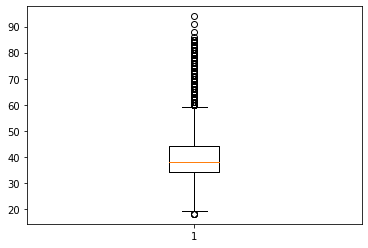

In [38]:
dataset1 = dataset.copy()


%matplotlib inline

plt.boxplot(dataset['custAge'])

In [20]:
dataset2 = dataset.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0xb9183d808>,
 'caps': [<matplotlib.lines.Line2D at 0xb9183de48>,
 'boxes': [<matplotlib.lines.Line2D at 0xb9183d108>],
 'medians': [<matplotlib.lines.Line2D at 0xb91837e08>],
 'fliers': [<matplotlib.lines.Line2D at 0xb91837ec8>],
 'means': []}

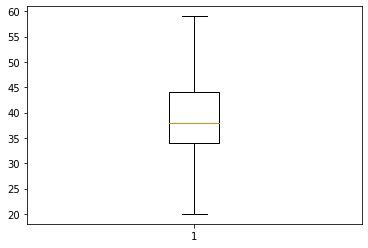

In [24]:
plt.boxplot(dataset1['custAge'])

In [22]:
cnames = ["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","pmonths","pastEmail"]

In [23]:
for i in cnames:
    q75, q25 = np.percentile(dataset1.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - iqr*1.5
    max = q75 + iqr*1.5
    
    dataset1 = dataset1.drop(dataset1[dataset1.loc[:,i] < min ].index)
    dataset1 = dataset1.drop(dataset1[dataset1.loc[:,i] > max ].index)

In [25]:
for i in cnames:
    q75, q25 = np.percentile(dataset2.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - iqr*1.5
    max = q75 + iqr*1.5
    
    dataset2[dataset2.loc[:,i] < min ] = np.nan
    dataset2[dataset2.loc[:,i] > max ] = np.nan

c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
c:\users\bhavesh\appdata\local

In [33]:
df_corr = dataset.loc[:,cnames]

c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
c:\users\bhavesh\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


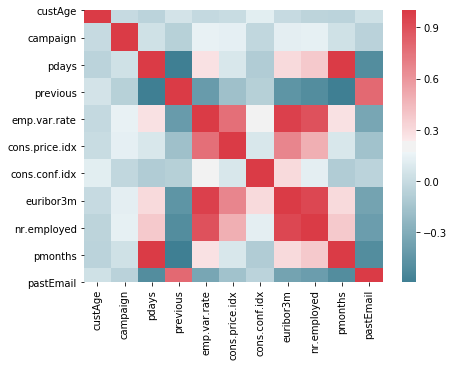

In [43]:
f, ax = plt.subplots(figsize=(7,5))

corr = df_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)


In [48]:
%matplotlib inline
np.set_printoptions(precision=4)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')



In [55]:
cat_names = ["profession", "marital", "schooling","default", "housing","loan", "contact", "month","day_of_week","poutcome"]


In [63]:
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(dataset['responded'],dataset[i]))
    print(p)
    print(ex)
    print(chi2)


profession
1.0827323425870329e-29
[[1671.4311 1476.3569  243.8427  165.8131  475.2716  272.2172  219.9018
   637.5379  129.4583 1074.6814  153.3992   54.0888]
 [ 213.5689  188.6431   31.1573   21.1869   60.7284   34.7828   28.0982
    81.4621   16.5417  137.3186   19.6008    6.9112]]
165.31838868559785
marital
0.00017203672335513166
[[7.4749e+02 3.9414e+03 1.8780e+03 7.0936e+00]
 [9.5511e+01 5.0361e+02 2.3997e+02 9.0639e-01]]
19.971863996779
schooling
0.0013090731423021408
[[1.9108e+03 4.7350e+02 2.4384e+02 6.9517e+02 1.0782e+03 8.8670e-01
  5.8877e+02 1.3779e+03 2.0483e+02]
 [2.4416e+02 6.0502e+01 3.1157e+01 8.8827e+01 1.3777e+02 1.1330e-01
  7.5231e+01 1.7607e+02 2.6172e+01]]
25.439525008478284
default
1.1219790857206688e-14
[[5.3034e+03 1.2698e+03 8.8670e-01]
 [6.7764e+02 1.6224e+02 1.1330e-01]]
64.24219427033505
housing
0.5469213692385477
[[3020.103   148.9657 3404.9312]
 [ 385.897    19.0343  435.0688]]
1.2069004719998173
loan
0.22684603797058037
[[5407.9884  148.9657 1017.0459]
 

In [62]:
dataset_fil = dataset.drop(['pdays','emp.var.rate','day_of_week','loan','housing'],axis=1)